In [344]:
#load libraries
import lib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [231]:
#load dataset
X,y = lib.generate_circle(samples=500)

In [ ]:
w = params_to_coef(X,y)
div = np.transpose(division(X,y,w))
big_div = np.ones((1,len(y)))

In [64]:
def plot_lines(X,y,W):
    fig, sub = plt.subplots(1,1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax= sub
    for w in W:
        # # Set-up 2x2 grid for plotting.


        X0, X1 = X[:,0], X[:,1]
        xx, yy = lib.make_meshgrid(X0, X1)

        # # ###########################################################################

        a = -w[0] / w[1]
        XX = np.linspace(-5, 5)
        YY = a * XX - w[2] / w[1]
        ax.plot(XX, YY, "-")
        # # ###########################################################################
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
def plot_lines_local(X,y,w):
    fig, sub = plt.subplots(1,1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax= sub
    # # Set-up 2x2 grid for plotting.


    X0, X1 = X[:,0], X[:,1]
    xx, yy = lib.make_meshgrid(X0, X1)

    # # ###########################################################################

    a = -w[0] / w[1]
    XX = np.linspace(-5, 5)
    YY = a * XX - w[2] / w[1]
    ax.plot(XX, YY, "-")
    # # ###########################################################################
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
def plotting_funciton(X,y,w):
    
    # # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(1,1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax= sub

    X0, X1 = X[:,0], X[:,1]
    xx, yy = lib.make_meshgrid(X0, X1)

    # # ###########################################################################

    a = -w[0] / w[1]
    XX = np.linspace(-5, 5)
    YY = a * XX - w[2] / w[1]
    ax.plot(XX, YY, "-")
    # # ###########################################################################

    # for clf, title, ax in zip(models, titles, sub.flatten()):
    lib.plot_contours(ax, svm, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('0')
    ax.set_ylabel('1')
    ax.set_xticks(())
    ax.set_yticks(())
    # ax.set_title(title)

    plt.show()
    
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [126]:
sep = split_dataset(X,y,w[0])
(sep==0)
# w[0][0]

False

In [270]:
def division(X,y,w):
    a = -w[0] / w[1]
    Xsvm = a * X[:,0] - w[2] / w[1]
    div = np.copy(y)
    div.fill(0)
    div[X[:,1]>Xsvm] = 1
    div = np.transpose(np.reshape(div,(-1,1)))
    return div

def split_dataset(X,y,w):
    a = -w[0] / w[1]
    Xsvm = a * X[:,0] - w[2] / w[1]
    div = np.zeros(len(y))
    div[X[:,1]>Xsvm] = 1
    div = np.transpose(np.reshape(div,(-1,1)))
    sep = div[0]
    y_left = y[sep==0]
    X_left = X[sep==0]
    y_right = y[sep==1]
    X_right = X[sep==1]
    return X_left, y_left,  X_right,  y_right

def split_testset(X,w):
    a = -w[0] / w[1]
    Xsvm = a * X[:,0] - w[2] / w[1]
    div = np.zeros(len(y))
    div[X[:,1]>Xsvm] = 1
    div = np.transpose(np.reshape(div,(-1,1)))
    sep = div[0]
    return sep

def smallify_dataset(X,y,sep):
#     print(sep)
    y_left = y[sep==0]
    X_left = X[sep==0]
    y_right = y[sep==1]
    X_right = X[sep==1]
    return X_left, y_left,  X_right,  y_right

#caluculate nearest neighbors
def find_nn(X,y,n_neighbors=50,n_most_different=50):
    if len(y)<n_neighbors:
        n_neighbors = len(y)
    if len(y)<n_most_different:
        n_most_different = len(y)
        
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    ys = y[indices]
    Xs = X[indices]
    most_different_nn = np.argsort(-np.var(ys,1))[:n_most_different]
    most_different_var = -np.sort(-np.var(ys,1))[:n_most_different]
    return Xs[most_different_nn],ys[most_different_nn],most_different_var

def find_proper_svm(X,y):
#     print(f'len X {X}')
#     print(f'len y {y}')
    Xs,ys,var = find_nn(X,y)
    combined_score = []
    clf = LinearSVC(random_state=0, tol=1e-5)
    for i in range(len(ys)):
        if np.std(ys[i]):
            clf.fit(Xs[i], ys[i])
            combined_score.append(clf.score(Xs[i], ys[i])*var[i])
            am = np.argmax(combined_score)
            return clf.fit(Xs[am], ys[am])
        else:
            return clf.fit(X, y)
            

def params_to_coef(X,y):
    svm = find_proper_svm(X,y)
    w = np.array([svm.coef_[0][0],svm.coef_[0][1],svm.intercept_[0]])
    return w



In [139]:
# class svm_tree:
#     def __init__(self,X,y,depth=5):
#         self.X = X
#         self.y = y
#         self.depth = depth

#         w0 = params_to_coef(X,y)
#         self.big_w = np.reshape(np.array(w0),(1,-1))
#         w = np.reshape(np.array(w0),(1,-1))
        
#         #div
#         self.div = division(X,y,w0)
#         self.big_div = np.ones((1,len(y)))
# #         self.forward_div()
# #         self.big_div = np.concatenate((self.big_div,self.div),axis=0)

#         #run each of the duplicates through svm 
        
#         #append div
        
        
#     #######################start loop here

#         for level in range(0, self.depth):
#             w_row = []
#             div_row = []
#             for split in w:
# #                 if np.std(row):
# #                 print(split)
#                 X_left, y_left,  X_right,  y_right = split_dataset(X,y,split)
                
#                 if np.std(y_left):
#                     wl = params_to_coef(X_left, y_left)
#                     print(f'level {level}, row {len(div_row)},left')
#                     plot_lines_local(X_left, y_left,wl)
#                     w_row.append(wl)
# #                     div_row.append(np.multiply(row,division(X,y,wl)))
#                 else: 
#                     w_row.append(np.array([0,0,0]))
# #                     div_row.append(np.multiply((1-row),np.ones((1,len(self.y)))))
                    
                    
#                 if np.std(y_right):
#                     wr = params_to_coef(X_right,  y_right)
#                     print(f'level {level}, row {len(div_row)},right')
#                     plot_lines_local(X_right,  y_right,wr)
#                     w_row.append(wr)
# #                     div_row.append(np.multiply((1-row),division(X,y,wr)))
#                 else: 
#                     w_row.append(np.array([0,0,0]))
# #                     div_row.append(np.multiply((1-row),np.ones((1,len(self.y)))))
#             w = np.array(w_row)
            
#             print(f'w {w}')
            
#             self.big_w = np.concatenate((self.big_w,w_row),axis=0) #fix later
# #             self.div = np.squeeze(np.array(div_row),1)
            
# #             print(f'big w {np.shape(self.big_w)}')

                    
#             self.forward_div()
                

                
                
            
            
#             # the routing division at current level
# #             _decision = decision[:, begin_idx:end_idx, :] # -> [batch_size,2**n_layer,2]
# #             mu = mu*_decision # -> [batch_size,2**n_layer,2]
# #             begin_idx = end_idx
# #             end_idx = begin_idx + 2 ** (n_layer+1)
# #             # merge left and right nodes to the same layer
# #             mu = mu.view(x.size(0), -1, 1)
# #             big_mu = torch.cat((big_mu,mu),1)
            
    
#     def forward_div(self):
# #         self.inv_div = 1-self.div
# #         self.div = np.concatenate((self.div, self.inv_div), axis=0)
#         self.big_div = np.concatenate((self.big_div, self.div), axis=0)
        
#     def node(Xn,yn,node_number,level):
#         #find proper devision
#         svm = find_proper_svm(Xn,yn)
#         #define divider function
#         self.div[node_number,:] = devision(self.X,self.y,svm)
#         #calculate SVM over children
#         X_left, y_left,  X_right,  y_right = smallify_dataset(Xm,ym,div)
#         node(X_left, y_left,2*node_number,level+1)
#         node(X_right,  y_right,2*node_number+1,level+1)

In [332]:
class nodal_tree:
    def __init__(self,X,y,depth=3):
        self.X = X
        self.y = y
        self.depth=depth
        self.nodes = []
        self.root = node(self,None,X,y,1,0)
        
        self.sort()
        
    def sort(self):
        a = [node.number for node in self.nodes]
        sortkey = list(np.argsort(a))
        self.nodes = [self.nodes[int(i)] for i in sortkey]
        
    def plot(self):
        
        fig, sub = plt.subplots(1,1)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        X = self.X
        y = self.y
        ax = sub
        
        for node in self.nodes:
            
            w = node.w

            X0, X1 = X[:,0], X[:,1]
            xx, yy = lib.make_meshgrid(X0, X1)

            # # ###########################################################################

            a = -w[0] / w[1]
            XX = np.linspace(-5, 5)
            YY = a * XX - w[2] / w[1]
            ax.plot(XX, YY, "-")
            # # ###########################################################################
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        
    def output_weights(self):
        
        weights = [node.w for node in self.nodes]

        
        return weights
        
    def predict(self,X):
        weights = self.output_weights()
        splits = []
        
        for w in weights:
            splits.append(split_testset(X,w))
        a = np.array(splits)
        y_pred = np.zeros(np.shape(a)[1])
        for ii in range(np.shape(a)[1]):
            b = a[:,ii]
            j=1
            for kk in range(depth):
                if b[j-1]:
                    j=2*j+1
                else:
                    j=2*j
            y_pred[ii] = nt.nodes[j-1].value
#             print(f'{ii+1}th sample reaches leaf {j} and has a prediction value of {y_pred[ii]}')
        return y_pred

    def accuracy(self,X,y):
        y_pred = self.predict(X)
        y_pred2 = (y_pred>0.5)
        y_pred2.astype(int)
        return accuracy_score(y, y_pred2)
        
class node:
    def __init__(self,tree,parent,Xn,yn,node_number,level):
        
        if parent==None:
            self.root = True
        else:
            self.root = False
            
        self.X = Xn
        self.y = yn
        self.number = node_number
        self.level = level
        self.tree = tree
        self.tree.nodes.append(self)
        self.parent = parent
        
        #define node value
        self.value = np.mean(yn)
        if np.isnan(self.value):
            self.value = parent.value

        #parameterize svm
        if len(yn) and np.std(yn):
            self.w = params_to_coef(Xn,yn)
        else:
            self.w = parent.w
        #calculate SVM over children
        if level<tree.depth:
            X_left, y_left,  X_right,  y_right = split_dataset(Xn,yn,self.w)
            self.l = node(tree,self,X_left, y_left,2*node_number,level+1)
            self.r = node(tree,self,X_right, y_right,2*node_number+1,level+1)
            self.leaf=False
        else:
            self.leaf=True
            
#     def predict(self,X):
#         if leaf==False:
#             X_left, y_left,  X_right,  y_right = split_testset(X,y,self.w)
#         else:
            

In [310]:
# #for routing function:
#         batch_size = x.size()[0]
#         mu = x.data.new(x.size(0),1,1).fill_(1.)
#         big_mu = x.data.new(x.size(0),2,1).fill_(1.)
#         begin_idx = 1
#         end_idx = 2
#         for n_layer in range(0, self.depth):
#             # mu stores the probability a sample is routed at certain node
#             # repeat it to be multiplied for left and right routing
#             mu = mu.repeat(1, 1, 2)
#             # the routing probability at n_layer
#             _decision = decision[:, begin_idx:end_idx, :] # -> [batch_size,2**n_layer,2]
#             mu = mu*_decision # -> [batch_size,2**n_layer,2]
#             begin_idx = end_idx
#             end_idx = begin_idx + 2 ** (n_layer+1)
#             # merge left and right nodes to the same layer
#             mu = mu.view(x.size(0), -1, 1)
#             big_mu = torch.cat((big_mu,mu),1)

#         big_mu = big_mu.view(x.size(0), -1)    

In [361]:
len(nt.nodes)

15

In [360]:
depth = 3
nt = nodal_tree(X,y,depth)
y_pred = nt.predict(X)
y_pred2 = (y_pred>0.5)
y_pred2.astype(int)
accuracy_score(y, y_pred2)

/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

0.798

In [355]:
depth =3
nt = nodal_tree(X,y,depth)
a = nt.predict(X)
for ii in range(np.shape(a)[1]):
    b = a[:,ii]
    j=1
    for kk in range(depth):
        if b[j-1]:
            j=2*j+1
        else:
            j=2*j
    y_pred = nt.nodes[j-1].value
    print(f'{ii+1}th sample reaches leaf {j} and has a prediction value of {y_pred}')

/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/guy/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret

IndexError: tuple index out of range

In [328]:
np.shape(a)

(15, 500)

level 0, row 0,left
level 0, row 1,right
level 1, row 0,left
level 1, row 1,right
level 1, row 2,left
level 1, row 3,right


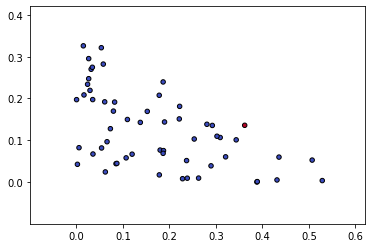

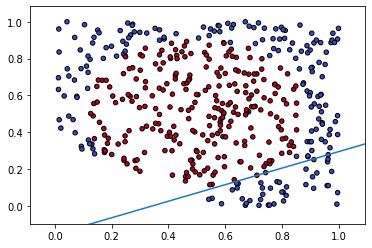

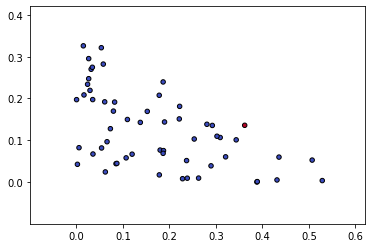

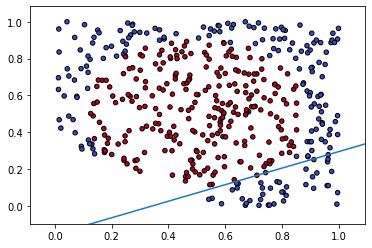

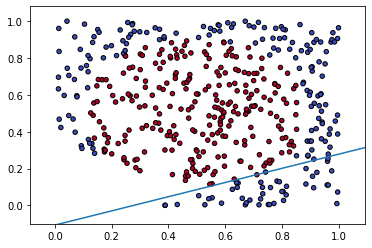

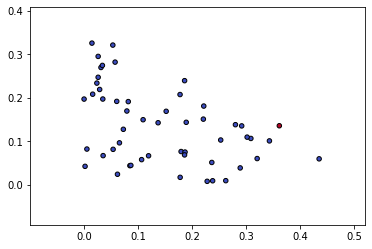

In [160]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
st = svm_tree(X,y,2)


In [157]:
np.sum(st.big_div,1)

array([500., 443.,  52., 443.,  52.,  51., 448.])

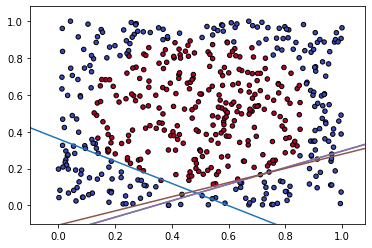

In [61]:
plot_lines(X,y,st.big_w)

In [36]:
w = st.big_w
fig, sub = plt.subplots(1,1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax= sub

    X0, X1 = X[:,0], X[:,1]
    xx, yy = lib.make_meshgrid(X0, X1)

    # # ###########################################################################

    a = -w[0] / w[1]
    XX = np.linspace(-5, 5)
    YY = a * XX - w[2] / w[1]
    ax.plot(XX, YY, "-")
    # # ###########################################################################

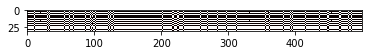

In [58]:
import matplotlib.pyplot as plt
import numpy as np

a = st.big_div
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()


In [ ]:
class svm_tree:
    def __init__(self,X,y,depth=5):
        self.X = X
        self.y = y
        self.depth = depth

        w = params_to_coef(X,y)
        self.big_w = np.reshape(np.array(w),(1,-1))
        
        X_big_list = []
        y_big_list = []
        
        #div
        self.div = division(X,y,w)
        self.big_div = np.ones((1,len(y)))
#         self.forward_div()
#         self.big_div = np.concatenate((self.big_div,self.div),axis=0)

        #run each of the duplicates through svm 
        
        #append div
        
        
    #######################start loop here

        for level in range(0, self.depth):
            w_row = []
            div_row = []
            X_list_l = []
            y_list_l = []
            X_list_r = []
            y_list_r = []
            for i,row in enumerate(self.div):
                if np.std(row):
                    X_left, y_left,  X_right,  y_right = smallify_dataset(X,y,row)
                    
                
                if np.std(y_left):
                    wl = params_to_coef(X_left, y_left)
                    print(f'level {level}, row {len(div_row)},left')
                    plot_lines_local(X_left, y_left,wl)
                    w_row.append(wl)
                    div_row.append(np.multiply(row,division(X,y,wl)))
                    X_list_l.append(X_left)
                    y_list_l.append(y_left)
                    
                else: 
                    w_row.append(np.array([0,0,0]))
                    div_row.append(1-row)
                    
                    
                if np.std(y_right):
                    wr = params_to_coef(X_right,  y_right)
                    print(f'level {level}, row {len(div_row)},right')
                    plot_lines_local(X_right,  y_right,wr)
                    w_row.append(wr)
                    div_row.append(np.multiply((1-row),division(X,y,wr)))
                    X_list_r.append(X_right)
                    y_list_r.append(y_right)
                else: 
                    w_row.append(np.array([0,0,0]))
                    div_row.append(1-row)
            w_row = np.array(w_row)
            
#             print(f'w {(w_row)}')
            
            self.big_w = np.concatenate((self.big_w,w_row),axis=0) #fix later
            self.div = np.squeeze(np.array(div_row),1)

#             print(f'big w {np.shape(self.big_w)}')

                    
            self.big_div = np.concatenate((self.big_div, self.div), axis=0)
                

                
                
            
            
            # the routing division at current level
#             _decision = decision[:, begin_idx:end_idx, :] # -> [batch_size,2**n_layer,2]
#             mu = mu*_decision # -> [batch_size,2**n_layer,2]
#             begin_idx = end_idx
#             end_idx = begin_idx + 2 ** (n_layer+1)
#             # merge left and right nodes to the same layer
#             mu = mu.view(x.size(0), -1, 1)
#             big_mu = torch.cat((big_mu,mu),1)
            
    
#     def forward_div(self):
#         self.inv_div = 1-self.div
#         self.div = np.concatenate((self.div, self.inv_div), axis=0)
#         self.big_div = np.concatenate((self.big_div, self.div), axis=0)

In [110]:
# class svm_tree:
#     def __init__(self,X,y,depth=5):
#         self.X = [X]
#         self.y = [y]
#         X_prev = [X]
#         y_prev = [y]
#         self.depth = depth
        
#         #1st divide
#         w = params_to_coef(X,y)
#         self.big_w = np.reshape(np.array(w),(1,-1))
        
#         #div
#         self.div = division(X,y,w)
#         self.big_div = np.ones((1,len(y)))
        
# #         self.forward_div()
# #         self.big_div = np.concatenate((self.big_div,self.div),axis=0)

#         #run each of the duplicates through svm 
        
#         #append div
        
        
#     #######################start loop here

#         for level in range(0, self.depth):
#             w_row = []
#             div_row = []
#             X_row = []
#             y_row = []
#             for i,row in enumerate(self.div):
#                 if np.std(row):
#                     X_left, y_left, X_right, y_right = smallify_dataset(X_prev[i],y_prev[i],row)
#                     X_row.append(X_left)
#                     X_row.append(X_right)
#                     y_row.append(y_left)
#                     y_row.append(y_right)
                    
                
#                 if np.std(y_left):
#                     wl = params_to_coef(X_left, y_left)
#                     w_row.append(wl)
#                     div_row.append(np.multiply(row,division(X,y,wl)))
#                 else: 
#                     w_row.append(np.array([0,0,0]))
#                     div_row.append(np.multiply((1-row),np.ones((1,len(self.y)))))
                    
                    
#                 if np.std(y_right):
#                     wr = params_to_coef(X_right,  y_right)
#                     w_row.append(wr)
#                     div_row.append(np.multiply((1-row),division(X,y,wr)))
#                 else: 
#                     w_row.append(np.array([0,0,0]))
#                     div_row.append(np.multiply((1-row),np.ones((1,len(self.y)))))
#             w_row = np.array(w_row)
            
#             X_prev = X_row.copy()
#             y_prev = y_row.copy()
# #             print(f'w {(w_row)}')
            
#             self.big_w = np.concatenate((self.big_w,w_row),axis=0) #fix later
#             self.div = np.squeeze(np.array(div_row),1)
            
# #             print(f'big w {np.shape(self.big_w)}')

                    
#             self.forward_div()
                

                
                
            
            
#             # the routing division at current level
# #             _decision = decision[:, begin_idx:end_idx, :] # -> [batch_size,2**n_layer,2]
# #             mu = mu*_decision # -> [batch_size,2**n_layer,2]
# #             begin_idx = end_idx
# #             end_idx = begin_idx + 2 ** (n_layer+1)
# #             # merge left and right nodes to the same layer
# #             mu = mu.view(x.size(0), -1, 1)
# #             big_mu = torch.cat((big_mu,mu),1)
            
    
#     def forward_div(self):
# #         self.inv_div = 1-self.div
# #         self.div = np.concatenate((self.div, self.inv_div), axis=0)
#         self.big_div = np.concatenate((self.big_div, self.div), axis=0)
        
#     def node(Xn,yn,node_number,level):
#         #find proper devision
#         svm = find_proper_svm(Xn,yn)
#         #define divider function
#         self.div[node_number,:] = devision(self.X,self.y,svm)
#         #calculate SVM over children
#         X_left, y_left,  X_right,  y_right = smallify_dataset(Xm,ym,div)
#         node(X_left, y_left,2*node_number,level+1)
#         node(X_right,  y_right,2*node_number+1,level+1)